# Redundance analysis - map, table, plot, text


SUMS:

- Is there a statistically significant difference in the total sum of fixation/visits lengths between different data presentation forms?
- Is there a statistically significant difference in the total sum of average fixation/visits lengths between different data presentation forms?
- Is there a statistically significant difference in the total sum of numbers of fixations/visits between different data presentation forms?

TASKS:

- Is there a statistically significant difference in the total length of fixation/visits between different data presentation forms?
- Is there a statistically significant difference in the average length of fixation/visits between different data presentation forms?
- Is there a statistically significant difference in the average pupil size between different data presentation forms?
- Is there a statistically significant difference in the number of fixations/visits between different data presentation forms?

AVERAGES:

- Is there a statistically significant difference in the average total length of fixation/visits between different data presentation forms?
- Is there a statistically significant difference in the average average length of fixation/visits between different data presentation forms?
- Is there a statistically significant difference in the average average pupil size between different data presentation forms?
- Is there a statistically significant difference in the average number of fixations/visits between different data presentation forms?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from functions.tests.multivariate_analysis import anova
from functions.tests.posthoc import anova_posthoc

In [2]:
df = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/map_tab_plt_txt.csv', index_col='idx')

df.sample(3)

,ID,Total_fix_1,Avg_fix_1,Num_fix_1,Avg_pupil_1,Total_visit_1,Avg_visit_1,Num_visit_1,Total_fix_2,Avg_fix_2,...,Avg_Total_visit,Sum_Avg_fix,Avg_Avg_fix,Sum_Avg_visit,Avg_Avg_visit,Sum_Num_fix,Avg_Num_fix,Sum_Num_visit,Avg_Num_visit,Avg_AvgPupil
idx,,,,,,,,,,,,,,,,,,,,,
104,24,10133,178.0,57,4.09132,18814,4703.0,4,0,NaN,...,13432.0,326.0,217.333333,7386.0,4924.0,96,48.0,7,3.5,4.041170
114,13,41061,268.0,153,3.48387,49982,9996.0,5,183,183.0,...,27115.5,637.0,318.500000,14245.0,7122.5,171,85.5,7,3.5,3.480120
53,16,11075,217.0,51,3.24876,13032,4344.0,3,11923,178.0,...,28400.5,563.0,281.500000,22488.0,11244.0,235,117.5,26,13.0,3.181687


In [3]:
ALPHA = 0.05

In [4]:
def test(data, columns, flag=True):
    for col in columns:
        print('#################################')
        print(col)
        if flag:
            data_copy = data.fillna(0)
        else:
            data_copy = data.copy()
        anova(data_copy, col, ['Group'], 'ID', ALPHA)
        
def posthoc_tests(df, columns):
    for col in columns:
        print('#################################')
        print(col)
        anova_posthoc(df, col, 'Group', 'ID')

In [5]:
fixations = df.filter(regex='.*fix.*').columns
visits = df.filter(regex='.*visit.*').columns

### Analyzing outliers

In [6]:
df.filter(regex='.*pupil.*').describe([.75, .9, .95, .99, .999]).T

,count,mean,std,min,50%,75%,90%,95%,99%,99.9%,max
Avg_pupil_1,141.0,3.416394,0.438379,2.68364,3.35424,3.74963,4.076160,4.216680,4.454400,4.486297,4.48699
Avg_pupil_2,153.0,3.413406,0.438701,2.70799,3.36283,3.68014,4.008874,4.275562,4.508463,4.586104,4.59915
Avg_pupil_3,153.0,3.334845,0.416731,2.63962,3.29306,3.62817,3.861874,4.140084,4.350662,4.380160,4.38166


In [7]:
df.filter(regex='.*pupil.*').median()

Avg_pupil_1    3.35424
Avg_pupil_2    3.36283
Avg_pupil_3    3.29306
dtype: float64

In [8]:
df.filter(regex='Total.*').describe([.75, .9, .95, .99, .999]).T

,count,mean,std,min,50%,75%,90%,95%,99%,99.9%,max
Total_fix_1,160.0,7371.168750,10378.888974,0.0,3092.00,10160.000,18253.10,29716.15,48565.740,57294.4670,58787.0
Total_visit_1,160.0,9796.237500,12862.922321,0.0,5237.00,13792.500,23604.70,39290.10,56992.100,66447.5930,67286.0
Total_fix_2,160.0,7990.206250,9848.588394,0.0,4341.00,9699.000,20778.40,30453.80,44049.690,51988.7900,52496.0
Total_visit_2,160.0,11002.275000,13142.518800,0.0,6166.50,14471.250,32393.60,41565.80,54191.860,65663.5990,66433.0
Total_fix_3,160.0,11317.393750,11586.486423,0.0,7807.50,15623.250,26100.50,31381.55,51745.040,70309.4390,73502.0
Total_visit_3,160.0,15078.612500,14362.943484,0.0,11618.00,20867.500,32605.30,42009.75,62326.520,80151.2130,82710.0
Sum_Total_fix,160.0,26678.768750,22139.078219,550.0,21121.50,35983.250,55495.10,67413.00,102440.780,133511.5190,138275.0
Avg_Total_fix,160.0,13339.384375,11069.539109,275.0,10560.75,17991.625,27747.55,33706.50,51220.390,66755.7595,69137.5
Sum_Total_visit,160.0,35877.125000,27322.949501,575.0,30460.50,48195.500,70824.70,86588.60,121174.850,165452.6570,172922.0
Avg_Total_visit,160.0,17938.562500,13661.474751,287.5,15230.25,24097.750,35412.35,43294.30,60587.425,82726.3285,86461.0


In [9]:
df.filter(regex='Total.*').median()

Total_fix_1         3092.00
Total_visit_1       5237.00
Total_fix_2         4341.00
Total_visit_2       6166.50
Total_fix_3         7807.50
Total_visit_3      11618.00
Sum_Total_fix      21121.50
Avg_Total_fix      10560.75
Sum_Total_visit    30460.50
Avg_Total_visit    15230.25
dtype: float64

In [10]:
for column in df.filter(regex='Total.*').columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        percentile_99 = df[column].quantile(0.99)
        records_above_99_percentile = df[df[column] > percentile_99]
        print(f"Number of records in the column '{column}' that are greater than 99% of the values: {len(records_above_99_percentile), list(records_above_99_percentile.ID)}")

Number of records in the column 'Total_fix_1' that are greater than 99% of the values: (2, [7, 20])
Number of records in the column 'Total_visit_1' that are greater than 99% of the values: (2, [7, 20])
Number of records in the column 'Total_fix_2' that are greater than 99% of the values: (2, [15, 2])
Number of records in the column 'Total_visit_2' that are greater than 99% of the values: (2, [15, 2])
Number of records in the column 'Total_fix_3' that are greater than 99% of the values: (2, [19, 2])
Number of records in the column 'Total_visit_3' that are greater than 99% of the values: (2, [19, 2])
Number of records in the column 'Sum_Total_fix' that are greater than 99% of the values: (2, [29, 2])
Number of records in the column 'Avg_Total_fix' that are greater than 99% of the values: (2, [29, 2])
Number of records in the column 'Sum_Total_visit' that are greater than 99% of the values: (2, [29, 2])
Number of records in the column 'Avg_Total_visit' that are greater than 99% of the val

In [11]:
df.filter(regex='Avg_(?!pupil).*').describe([.75, .9, .95, .99, .999]).T

,count,mean,std,min,50%,75%,90%,95%,99%,99.9%,max
Avg_fix_1,141.0,187.042553,49.544046,75.000000,186.000000,225.000000,246.000000,265.000000,285.400000,325.700000,332.000000
Avg_visit_1,141.0,2572.226950,3373.798200,92.000000,1320.000000,4013.000000,5816.000000,6783.000000,16732.000000,23599.480000,24344.000000
Avg_fix_2,153.0,181.143791,43.724379,99.000000,178.000000,214.000000,239.200000,251.400000,277.400000,321.552000,329.000000
Avg_visit_2,153.0,2030.470588,2420.900833,108.000000,1326.000000,2452.000000,4197.400000,5715.400000,12866.080000,16875.968000,16924.000000
Avg_fix_3,153.0,186.143791,45.003277,79.000000,189.000000,215.000000,242.600000,259.400000,290.880000,302.480000,304.000000
Avg_visit_3,153.0,2631.071895,2711.385185,79.000000,1938.000000,3022.000000,5267.400000,9085.800000,12237.000000,15297.824000,15695.000000
Avg_Total_fix,160.0,13339.384375,11069.539109,275.000000,10560.750000,17991.625000,27747.550000,33706.500000,51220.390000,66755.759500,69137.500000
Avg_Total_visit,160.0,17938.562500,13661.474751,287.500000,15230.250000,24097.750000,35412.350000,43294.300000,60587.425000,82726.328500,86461.000000
Sum_Avg_fix,160.0,516.050000,141.948560,155.000000,529.000000,617.750000,690.600000,737.050000,786.050000,789.841000,790.000000
Avg_Avg_fix,160.0,269.137500,58.804930,128.000000,272.250000,310.625000,345.300000,368.525000,393.025000,394.920500,395.000000


In [12]:
df.filter(regex='Avg_(?!pupil).*').median()

Avg_fix_1            186.000000
Avg_visit_1         1320.000000
Avg_fix_2            178.000000
Avg_visit_2         1326.000000
Avg_fix_3            189.000000
Avg_visit_3         1938.000000
Avg_Total_fix      10560.750000
Avg_Total_visit    15230.250000
Sum_Avg_fix          529.000000
Avg_Avg_fix          272.250000
Sum_Avg_visit       5338.000000
Avg_Avg_visit       2731.166667
Avg_Num_fix           58.500000
Avg_Num_visit          7.500000
Avg_AvgPupil           3.354507
dtype: float64

In [13]:
df.filter(regex='Num.*').describe([.75, .9, .95, .99, .999]).T

,count,mean,std,min,50%,75%,90%,95%,99%,99.9%,max
Num_fix_1,160.0,35.687500,45.413431,0.0,18.5,56.25,88.2,140.000,201.58,233.2510,235.0
Num_visit_1,160.0,3.975000,3.315582,0.0,3.0,6.00,9.0,10.000,13.00,13.8410,14.0
Num_fix_2,160.0,41.925000,48.354112,0.0,25.5,55.00,110.3,148.700,206.27,249.1380,252.0
Num_visit_2,160.0,5.506250,3.938197,0.0,5.0,7.00,12.0,13.000,17.05,21.6820,22.0
Num_fix_3,160.0,57.212500,52.549035,0.0,45.0,80.00,122.1,145.600,233.56,255.6150,258.0
Num_visit_3,160.0,6.837500,5.958861,0.0,6.0,10.00,14.0,16.000,29.33,38.6820,39.0
Sum_Num_fix,160.0,134.825000,98.182000,3.0,117.0,183.00,253.2,311.050,416.76,588.5390,617.0
Avg_Num_fix,160.0,67.412500,49.091000,1.5,58.5,91.50,126.6,155.525,208.38,294.2695,308.5
Sum_Num_visit,160.0,16.318750,8.714458,2.0,15.0,21.00,27.0,31.050,44.64,51.2050,52.0
Avg_Num_visit,160.0,8.159375,4.357229,1.0,7.5,10.50,13.5,15.525,22.32,25.6025,26.0


In [14]:
df.filter(regex='Num.*').median()

Num_fix_1         18.5
Num_visit_1        3.0
Num_fix_2         25.5
Num_visit_2        5.0
Num_fix_3         45.0
Num_visit_3        6.0
Sum_Num_fix      117.0
Avg_Num_fix       58.5
Sum_Num_visit     15.0
Avg_Num_visit      7.5
dtype: float64

In [15]:
for column in df.filter(regex='Num_fix.*').columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        percentile_99 = df[column].quantile(0.99)
        records_above_99_percentile = df[df[column] > percentile_99]
        print(f"Number of records in the column '{column}' that are greater than 99% of the values: {len(records_above_99_percentile), list(records_above_99_percentile.ID)}")

Number of records in the column 'Num_fix_1' that are greater than 99% of the values: (2, [7, 20])
Number of records in the column 'Num_fix_2' that are greater than 99% of the values: (2, [15, 2])
Number of records in the column 'Num_fix_3' that are greater than 99% of the values: (2, [19, 2])
Number of records in the column 'Sum_Num_fix' that are greater than 99% of the values: (2, [29, 2])
Number of records in the column 'Avg_Num_fix' that are greater than 99% of the values: (2, [29, 2])


Wartości odstające wyjaśnienia:
- wielkość źrenicy: w normie (brak błędów, nie ma potrzeby odrzucać)
- całkowita długość fiksacji/wizyt: do sprawdzenia: 2, 7, 15, 19, 20, 29 
- średnia długość fiksacji/wizyt: mediany i średnie zbliżone - nie ma potrzeby odrzucać wartości odstających, są to poprawne wartości
- liczba fiksacji: do sprawdzenia: 2, 7, 15, 19, 20, 29
- liczba wizyt: mediany i średnie zbliżone, nie ma potrzeby odrzucać wartości odstających

Outliers - explanation:
- pupil size: normal (no errors, no need to reject)
- total length of fixations/visits: to check: 2, 7, 15, 19, 20, 29
- average length of fixations/visits: medians and averages are similar - no need to reject outliers, these are correct values
- number of fixations: to check: 2, 7, 15, 19, 20, 29
- number of visits: medians and averages are similar, no need to reject outliers

Validate gaze data for participants: 2, 7, 15, 19, 20, 29

2 - 94%
7 - 95%
15 - 92%
19 - 97%
20 - 93%
29 - 97%

Conclusion: data is legit, no need to reject outliers!

### STATISTICAL ANALYSIS

In [16]:
# fixations
test(df, fixations)

#################################
Total_fix_1
       F Value  Num DF  Den DF    Pr > F
Group  4.78925     3.0   117.0  0.003489
-------------------
Zmienna: Group, P-value: 0.0034889053
There are grounds to reject H0, accept H1.
#################################
Avg_fix_1
        F Value  Num DF  Den DF   Pr > F
Group  8.105871     3.0   117.0  0.00006
-------------------
Zmienna: Group, P-value: 0.0000596570
There are grounds to reject H0, accept H1.
#################################
Num_fix_1
        F Value  Num DF  Den DF    Pr > F
Group  4.295674     3.0   117.0  0.006492
-------------------
Zmienna: Group, P-value: 0.0064918927
There are grounds to reject H0, accept H1.
#################################
Total_fix_2
        F Value  Num DF  Den DF    Pr > F
Group  2.053489     3.0   117.0  0.110197
-------------------
Zmienna: Group, P-value: 0.1101974483
No reason to reject H0, accept H0.
#################################
Avg_fix_2
        F Value  Num DF  Den DF    Pr > F
Group 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


        F Value  Num DF  Den DF    Pr > F
Group  2.655954     3.0   117.0  0.051681
-------------------
Zmienna: Group, P-value: 0.0516809338
No reason to reject H0, accept H0.
#################################
Avg_fix_3
         F Value  Num DF  Den DF        Pr > F
Group  13.310646     3.0   117.0  1.554864e-07
-------------------
Zmienna: Group, P-value: 0.0000001555
There are grounds to reject H0, accept H1.
#################################
Num_fix_3
        F Value  Num DF  Den DF   Pr > F
Group  3.221947     3.0   117.0  0.02525
-------------------
Zmienna: Group, P-value: 0.0252497418
There are grounds to reject H0, accept H1.
#################################
Sum_Total_fix
       F Value  Num DF  Den DF    Pr > F
Group  1.66887     3.0   117.0  0.177504
-------------------
Zmienna: Group, P-value: 0.1775038305
No reason to reject H0, accept H0.
#################################
Avg_Total_fix
       F Value  Num DF  Den DF    Pr > F
Group  1.66887     3.0   117.0  0.177504
----

In [17]:
posthoc_tests(df, ['Avg_fix_1', 'Avg_fix_2', 'Avg_fix_3'])

#################################
Avg_fix_1
-----------------------
Groups: mapa vs tabela
P-value: 0.1606753171356828
No reason to reject H0, accept H0.
-----------------------
Groups: mapa vs tekst
P-value: 0.7935573164422152
No reason to reject H0, accept H0.
-----------------------
Groups: mapa vs wykres
P-value: 0.08133677861126677
No reason to reject H0, accept H0.
-----------------------
Groups: tabela vs tekst
P-value: 0.1606753171356828
No reason to reject H0, accept H0.
-----------------------
Groups: tabela vs wykres
P-value: 0.7935573164422152
No reason to reject H0, accept H0.
-----------------------
Groups: tekst vs wykres
P-value: 0.07021645754056251
No reason to reject H0, accept H0.
#################################
Avg_fix_2
-----------------------
Groups: mapa vs tabela
P-value: 0.6854500938195374
No reason to reject H0, accept H0.
-----------------------
Groups: mapa vs tekst
P-value: 0.005560036172547058
There are grounds to reject H0, accept H1.
------------------

### Summary:

Statistically significant (fixations):

- total_fix_1: table vs text, text vs plot
- avg_fix_1: weakly differentiated
- num_fix_1: table vs text, text vs plot
- avg_fix_2: map vs text, table vs text
- avg_fix_3: table vs text
- num_fix_3: weakly differentiated
- Sum_avg_fix: map vs text, table vs text, table vs plot, text vs plot
- Avg_avg_fix: map vs text, table vs text, table vs plot, text vs plot

In [18]:
# average pupil size
test(df, ['Avg_AvgPupil'], flag=False)

#################################
Avg_AvgPupil
        F Value  Num DF  Den DF    Pr > F
Group  0.889447     3.0   117.0  0.448863
-------------------
Zmienna: Group, P-value: 0.4488632651
No reason to reject H0, accept H0.


In [19]:
# visits
test(df, visits)

#################################
Total_visit_1
        F Value  Num DF  Den DF    Pr > F
Group  3.866321     3.0   117.0  0.011166
-------------------
Zmienna: Group, P-value: 0.0111656340
There are grounds to reject H0, accept H1.
#################################
Avg_visit_1
        F Value  Num DF  Den DF    Pr > F
Group  1.053147     3.0   117.0  0.371898
-------------------
Zmienna: Group, P-value: 0.3718975634
No reason to reject H0, accept H0.
#################################
Num_visit_1
         F Value  Num DF  Den DF        Pr > F
Group  23.709747     3.0   117.0  4.641525e-12
-------------------
Zmienna: Group, P-value: 0.0000000000
There are grounds to reject H0, accept H1.
#################################
Total_visit_2
        F Value  Num DF  Den DF    Pr > F
Group  2.302248     3.0   117.0  0.080699
-------------------
Zmienna: Group, P-value: 0.0806985690
No reason to reject H0, accept H0.
#################################
Avg_visit_2
        F Value  Num DF  Den DF 

In [20]:
posthoc_tests(df, ['Total_visit_1', 'Num_visit_1', 'Num_visit_2', 'Total_visit_3', 'Num_visit_3', 'Sum_Num_visit', 'Avg_Num_visit'])

#################################
Total_visit_1
-----------------------
Groups: mapa vs tabela
P-value: 0.3950469246847968
No reason to reject H0, accept H0.
-----------------------
Groups: mapa vs tekst
P-value: 0.38764684924351195
No reason to reject H0, accept H0.
-----------------------
Groups: mapa vs wykres
P-value: 0.7302470580916633
No reason to reject H0, accept H0.
-----------------------
Groups: tabela vs tekst
P-value: 0.013956875231309876
There are grounds to reject H0, accept H1.
-----------------------
Groups: tabela vs wykres
P-value: 0.7302470580916633
No reason to reject H0, accept H0.
-----------------------
Groups: tekst vs wykres
P-value: 0.004948047840629065
There are grounds to reject H0, accept H1.
#################################
Num_visit_1
-----------------------
Groups: mapa vs tabela
P-value: 0.0014443159557107343
There are grounds to reject H0, accept H1.
-----------------------
Groups: mapa vs tekst
P-value: 0.0001555388977071558
There are grounds to rej

### Summary:

Statistically significant (visits):

- total_visit_1: table vs text, text vs plot
- num_visit_1: map vs table, map vs text, table vs text, table vs plot, text vs plot
- num_visit_2: map vs table, map vs plot, table vs text, text vs plot
- total_visit_3: weakly differentiated
- num_visit_3: map vs text, map vs plot, table vs text, table vs plot, text vs plot
- Sum_num_visit: map vs text, table vs text, text vs plot
- Avg_num_visit: map vs text, table vs text, text vs plot

### Plots

In [21]:
def plots(df, var, typee, y1, y2, label, tt1=False, wtxt1=False, tabw1=False, mtxt1=False, mtab1=False, tt2=False, wtxt2=False, mtxt2=False, mtab2=False, mw2=False, tt3=False, wtxt3=False, tabw3=False, mtxt3=False, mtab3=False, mw3=False):
    value_vars=[f'{var}_{typee}_1', f'{var}_{typee}_2', f'{var}_{typee}_3']
    if var != 'Num':
        for val in value_vars:
            df[val] = df[val]/1000

    df_new = pd.DataFrame()
    
    for i, col in enumerate(value_vars):
        df_new[f'{i+1}map_{var}_{typee}'] = df[col][df['Group'] == 'mapa'].values
        df_new[f'{i+1}tab_{var}_{typee}'] = df[col][df['Group'] == 'tabela'].values
        df_new[f'{i+1}plt_{var}_{typee}'] = df[col][df['Group'] == 'wykres'].values
        df_new[f'{i+1}txt_{var}_{typee}'] = df[col][df['Group'] == 'tekst'].values
        
    df_long = pd.melt(df_new, value_vars=[f'{1}map_{var}_{typee}', f'{1}tab_{var}_{typee}', f'{1}plt_{var}_{typee}', f'{1}txt_{var}_{typee}', f'{2}map_{var}_{typee}', f'{2}tab_{var}_{typee}', f'{2}plt_{var}_{typee}', f'{2}txt_{var}_{typee}', f'{3}map_{var}_{typee}', f'{3}tab_{var}_{typee}', f'{3}plt_{var}_{typee}', f'{3}txt_{var}_{typee}'], var_name='Pair', value_name='Value')

    colors = sns.color_palette('pastel', n_colors=4)
    hue_order = [f'{1}map_{var}_{typee}', f'{1}tab_{var}_{typee}', f'{1}plt_{var}_{typee}', f'{1}txt_{var}_{typee}', f'{2}map_{var}_{typee}', f'{2}tab_{var}_{typee}', f'{2}plt_{var}_{typee}', f'{2}txt_{var}_{typee}', f'{3}map_{var}_{typee}', f'{3}tab_{var}_{typee}', f'{3}plt_{var}_{typee}', f'{3}txt_{var}_{typee}']

    labels = ['mapa\n(1)', 'tabela\n(1)', 'wykres\n(1)', 'tekst\n(1)', 'mapa\n(2)\n', 'tabela\n(2)', 'wykres\n(2)', 'tekst\n(2)\n', 'mapa\n(3)', 'tabela\n(3)', 'wykres\n(3)\n', 'tekst\n(3)\n']

    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, 
                     hue_order=hue_order, width=0.4)

    #1
    # map vs text
    if mtxt1:
        plt.annotate('', xy=(0.035, 1.02), xycoords='axes fraction', xytext=(0.3, 1.02),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.16, 0.99), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)
        
    # map vs table
    if mtab1:
        plt.annotate('', xy=(0.035, 1.07), xycoords='axes fraction', xytext=(0.13, 1.07),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.08, 1.04), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)
        
    #table vs text
    if tt1:
        plt.annotate('', xy=(0.12, 1.12), xycoords='axes fraction', xytext=(0.3, 1.12),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.21, 1.09), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)
        
    #table vs plot
    if tabw1:
        plt.annotate('', xy=(0.12, 1.17), xycoords='axes fraction', xytext=(0.21, 1.17),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.16, 1.14), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    # plot vs text
    if wtxt1:
        plt.annotate('', xy=(0.2, 1.07), xycoords='axes fraction', xytext=(0.3, 1.07),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.25, 1.04), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    # 2
    # table vs text
    if tt2:
        plt.annotate('', xy=(0.46, 1.12), xycoords='axes fraction', xytext=(0.63, 1.12),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.54, 1.09), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15) 

    # plot vs text
    if wtxt2:
        plt.annotate('', xy=(0.53, 1.17), xycoords='axes fraction', xytext=(0.63, 1.17),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.58, 1.14), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)
        
    # map vs text
    if mtxt2:
        plt.annotate('', xy=(0.37, 1.02), xycoords='axes fraction', xytext=(0.63, 1.02),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.5, 0.99), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    # map vs table
    if mtab2:
        plt.annotate('', xy=(0.37, 1.07), xycoords='axes fraction', xytext=(0.47, 1.07),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.42, 1.04), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    # map vs plot
    if mw2:
        plt.annotate('', xy=(0.37, 1.02), xycoords='axes fraction', xytext=(0.55, 1.02),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.46, 0.99), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    # 3
    # table vs text
    if tt3:
        plt.annotate('', xy=(0.79, 1.12), xycoords='axes fraction', xytext=(0.97, 1.12),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.88, 1.09), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    # plot vs text
    if wtxt3:
        plt.annotate('', xy=(0.88, 1.22), xycoords='axes fraction', xytext=(0.97, 1.22),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.92, 1.19), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    #table vs plot
    if tabw3:
        plt.annotate('', xy=(0.79, 1.17), xycoords='axes fraction', xytext=(0.89, 1.17),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.84, 1.14), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    # map vs text
    if mtxt3:
        plt.annotate('', xy=(0.7, 1.02), xycoords='axes fraction', xytext=(0.97, 1.02),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.84, 0.99), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    # map vs table
    if mtab3:
        plt.annotate('', xy=(0.7, 1.07), xycoords='axes fraction', xytext=(0.89, 1.07),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.795, 1.04), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    # map vs plot
    if mw3:
        plt.annotate('', xy=(0.7, 1.07), xycoords='axes fraction', xytext=(0.89, 1.07),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.795, 1.04), xycoords='axes fraction', textcoords='axes fraction',
                     ha='center', va='bottom', fontsize=15)

    plt.xlabel('')
    plt.ylim(y1, y2)
    plt.xticks(rotation=0)
    ax.set_xticklabels(labels)
    plt.ylabel(label)
    plt.show()

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:24: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors,
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


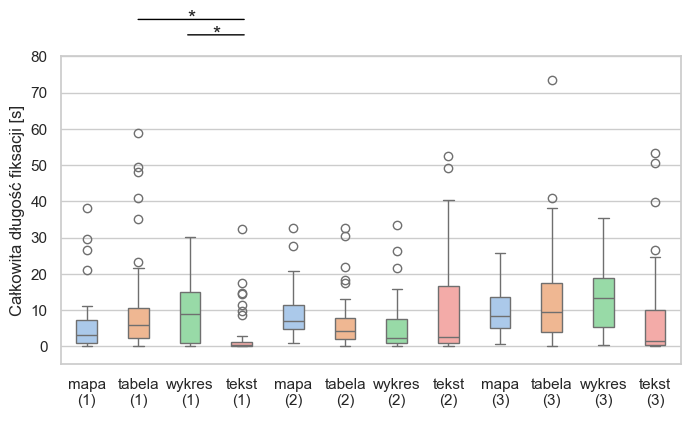

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:24: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors,
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


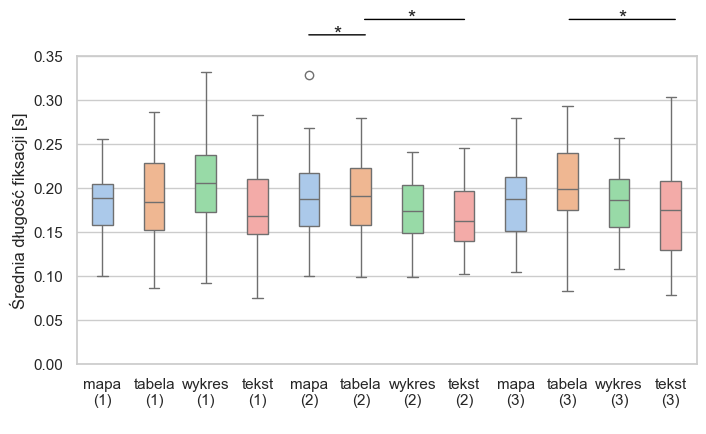

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:24: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors,
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


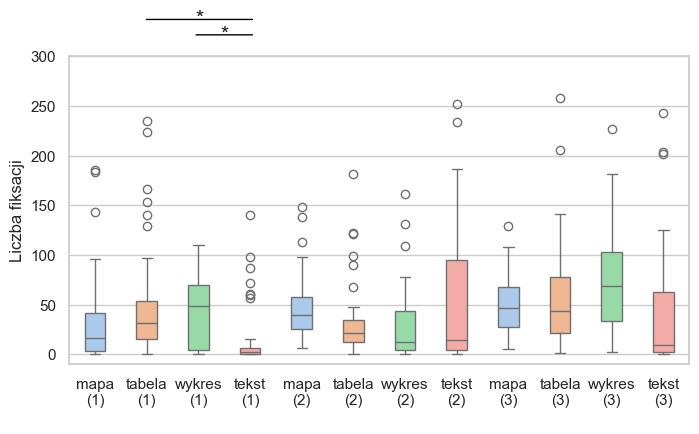

In [22]:
plots(df, 'Total', 'fix', -5, 80, 'Całkowita długość fiksacji [s]', tt1=True, wtxt1=True)
plots(df, 'Avg', 'fix', 0, 0.35, 'Średnia długość fiksacji [s]', mtab2=True, tt2=True, tt3=True)
plots(df, 'Num', 'fix', -10, 300, 'Liczba fiksacji', tt1=True, wtxt1=True)

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:24: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors,
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


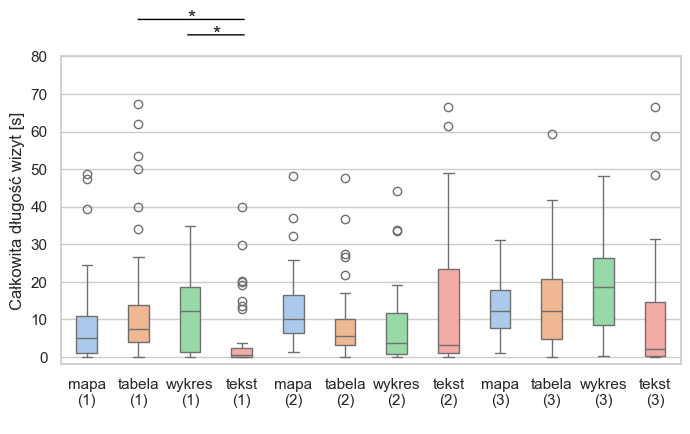

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:24: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors,
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


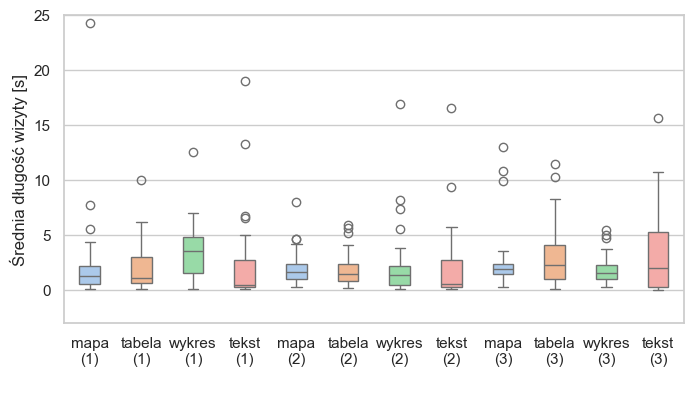

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:24: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors,
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_4051/2291542343.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


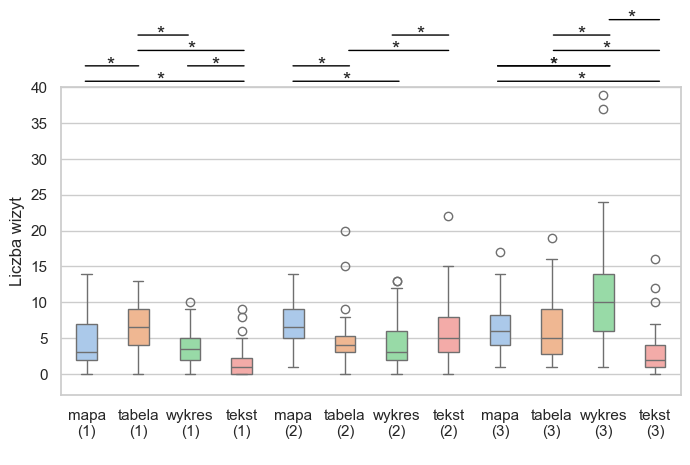

In [23]:
plots(df, 'Total', 'visit', -2, 80, 'Całkowita długość wizyt [s]', tt1=True, wtxt1=True)
plots(df, 'Avg', 'visit', -3, 25, 'Średnia długość wizyty [s]')
plots(df, 'Num', 'visit', -3, 40, 'Liczba wizyt', tt1=True, wtxt1=True, tabw1=True, mtxt1=True, mtab1=True, tt2=True, wtxt2=True, mtab2=True, mw2=True, tt3=True, wtxt3=True, tabw3=True, mtxt3=True, mtab3=True, mw3=True)